In [1]:
import os
import sys
from pathlib import Path
from glob import glob
import json
import numpy as np

currentdir = Path.cwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
sys.path.insert(1, os.path.join(parentdir, 'evaluation')) 
sys.path.insert(1, os.path.join(parentdir, 'configuration')) 
print(sys.path)

from evaluation import metrics_csvreader, optimal_parameters
from configuration import get_config as config

['C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\configuration', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\evaluation', 'C:\\Users\\tkachenko\\Desktop\\HSI\\hsi-experiments\\jupyter', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf\\python311.zip', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf\\DLLs', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf\\Lib', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf', '', 'C:\\Users\\tkachenko\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf\\Lib\\site-packages', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf\\Lib\\site-packages\\win32', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\tkachenko\\Anaconda3\\envs\\tf\\Lib\\site-packages\\Pythonwin']


In [3]:
# check if all combinations were tested

name = 'MainExperiment_3_smoothing_3d'
delimiter = '/'

root_folder = "D:\\mi186veva-logs\\MainExperiment_3_smoothing_3d"
#root_folder = f"/work/mi186veva-logs/{name}"

folders = glob(root_folder + f"{delimiter}*{delimiter}step_55*\\")

print(len(folders))

#check if results are complete
#results_folder = f"/work/mi186veva-results/{name}"
results_folder = f"D:\\mi186veva-results\\{name}"
results_folders = glob(results_folder + f"{delimiter}*{delimiter}Results_with_EarlyStopping/metrics_by_threshold_0.6.csv")

print(len(results_folders))



252
252


In [4]:
# check if all combinations were tested
#folders = glob(root_folder + f"{delimiter}*{delimiter}/")
print(len(folders))
combination_numbers = [int(folder.split(delimiter)[-3].split('_')[0]) for folder in folders]

should_be = np.arange(252)

not_tested_combinations = np.setxor1d(combination_numbers, should_be)
print(not_tested_combinations)
assert len(not_tested_combinations) > 0

247
[201 214 215 228 234]


In [2]:
# remove all checkpoints except the last one
from shutil import rmtree
from tqdm import tqdm
root_folder = "D:\\mi186veva-logs\\"
d = '\\'

logs = glob(os.path.join(root_folder, f'*{d}'))
print(logs)

for logs_folder in logs:
    combinations = glob(os.path.join(logs_folder, f'*{d}'))
    print(len(combinations))
    print(logs_folder)
    for combination in tqdm(combinations):
        steps = glob(os.path.join(combination, f'*{d}'))
        #print(len(steps))
        for step in steps:
            #print(step)
            checkpoints = glob(os.path.join(step, 'checkpoints', f'*{d}'))
            #print('\n'.join(checkpoints))
            checkpoints = sorted(checkpoints, key=lambda x: int(os.path.basename(os.path.normpath(x)).split('-')[1]))
            #print('------------------Sorted-------------')
            #print('\n'.join(checkpoints))
            for checkpoint in checkpoints[:-1]:
                #print('Removing...', checkpoint)
                rmtree(checkpoint)

['D:\\mi186veva-logs\\MainExperiment_3_smoothing_1d\\', 'D:\\mi186veva-logs\\MainExperiment_3_smoothing_2d\\', 'D:\\mi186veva-logs\\MainExperiment_3_smoothing_3d\\', 'D:\\mi186veva-logs\\MainExperiment_3_smoothing_savgol\\']
252
D:\mi186veva-logs\MainExperiment_3_smoothing_1d\


100%|████████████████████████████████████████████████████████████████████████████████| 252/252 [16:36<00:00,  3.96s/it]


252
D:\mi186veva-logs\MainExperiment_3_smoothing_2d\


100%|██████████████████████████████████████████████████████████████████████████████| 252/252 [1:23:27<00:00, 19.87s/it]


252
D:\mi186veva-logs\MainExperiment_3_smoothing_3d\


100%|██████████████████████████████████████████████████████████████████████████████| 252/252 [1:11:33<00:00, 17.04s/it]


36
D:\mi186veva-logs\MainExperiment_3_smoothing_savgol\


100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [08:12<00:00, 13.67s/it]


In [ ]:
root_folder = "D:\\mi186veva-results\\"
d = '\\'

results = 

In [17]:
import csv

def write_to_csv(row_to_add):
        file_path = 'results.csv'

        with open(file_path, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(row_to_add)
            
def parse_combination_parameters(name):
    parts = name.split('_')
    
    scaling = parts[2]
    if scaling[1] == 'l':
        scaling = 'normalization'
    elif scaling[1] == 's':
        scaling = 'svn'
        
    sample_weights = parts[3]
    if sample_weights[1] == 'T':
        sample_weights = True
    elif sample_weights[1] == 'F':
        sample_weights = False
        
    smoothing = parts[4]
    if len(smoothing) == 1:
        smoothing = None
    else:
        smoothing = smoothing[1]
    
    smoothing_value = parts[5]
    smoothing_value = float(smoothing_value[1:])
    
    background = parts[6]
    if background[1] == 'T':
        background = True
    elif background[1] == 'F':
        background = False
        
    background_blood = parts[7]
    background_blood = float(background_blood[1:])
    
    background_light = parts[8]
    background_light = float(background_light[1:])
    
    return scaling, sample_weights, smoothing, smoothing_value, background, background_blood, background_light
    

parse_combination_parameters('164_3D3_Nl_WF_Sm_S3_BT_B0.1_B0.4_')

('normalization', False, 'm', 3.0, True, 0.1, 0.4)

In [18]:
#root_folder = "D:\\mi186veva-results\\MainExperiment_3d_3_fixed_background"
#root_folder = "/work/mi186veva-results/MainExperiment_3d_3_fixed_background"
#delimiter = '\\'
folders = glob(root_folder + f"{delimiter}*{delimiter}")

print(len(folders))

column_names = ['Name', 
              'Scaling', 
              'Sample_weights', 
              'Smoothing', 
              'Smoothing_value', 
              'Background', 
              'Background_blood', 
              'Background_light',
              'Threshold',
              'Sensitivity',
              'Specificity',
              'Mean between sensitivity and specificity']
write_to_csv(column_names)

table = []

for folder in folders:
    name = folder.split(f"{delimiter}")[-2]
    scaling, sample_weights, smoothing, smoothing_value, background, background_blood, background_light = parse_combination_parameters(name)
    optimal_threshold_finder = optimal_parameters.OptimalThreshold(config, root_folder, prints=False)
    print(name)
    folder_with_checkoint = os.path.join(folder, "Results_with_EarlyStopping")
    results = optimal_threshold_finder.find_optimal_threshold_in_checkpoint(folder_with_checkoint)
    thr, sens, spec, mean, _ = results
    
    row = [name,
          scaling, 
          sample_weights, 
          smoothing, 
          smoothing_value, 
          background, 
          background_blood, 
          background_light, 
          thr, 
          sens, 
          spec, 
          mean]
    
    table.append(row)
    write_to_csv(row)

table = np.array(table)


252
111_3D3_Nl_WT_Sm_S3.0_BT_B0.1_B0.6_


FileNotFoundError: [Errno 2] No such file or directory: '/work/mi186veva-logs/MainExperiment_3_smoothing_2d/111_3D3_Nl_WT_Sm_S3.0_BT_B0.1_B0.6_/Results_with_EarlyStopping/compare_all_thresholds.csv'

In [8]:
# check if all sensitivity / specificity were picked optimal 

for row in table:
    print(row[0], "Passed" if np.abs(row[-3] - row[-2]) < 0.01 else str(np.abs(row[-3] - row[-2])), row[-3], row[-2], row[-4])

0_3D3_Ns_WT_Sm_S3_BF_B0.1_B0.25_ 0.012655258 0.7048416 0.7174969 0.4487
100_3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.25_ Passed 0.6964998 0.6912692 0.4669
101_3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.4_ Passed 0.6948902 0.70024544 0.3822
102_3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.6_ Passed 0.691446 0.69675124 0.3943
103_3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.7_ Passed 0.69609463 0.70184916 0.3822
104_3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.25_ Passed 0.70605034 0.69848907 0.4487
105_3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.4_ Passed 0.68008554 0.6827585 0.3943
106_3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.6_ Passed 0.7028764 0.70045835 0.4003
107_3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.7_ Passed 0.67602676 0.6687425 0.3882
108_3D3_Nl_WT_Sm_S3_BF_B0.1_B0.25_ 0.06911564 0.47166365 0.5407793 0.5032
109_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.25_ 0.03577411 0.49100775 0.52678186 0.4487
10_3D3_Ns_WT_Sm_S5_BT_B0.1_B0.25_ Passed 0.6857879 0.67915887 0.4306
110_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.4_ Passed 0.5111183 0.50907505 0.5032
111_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.6_ 0.062671006 0.5868401 0.5241691 0

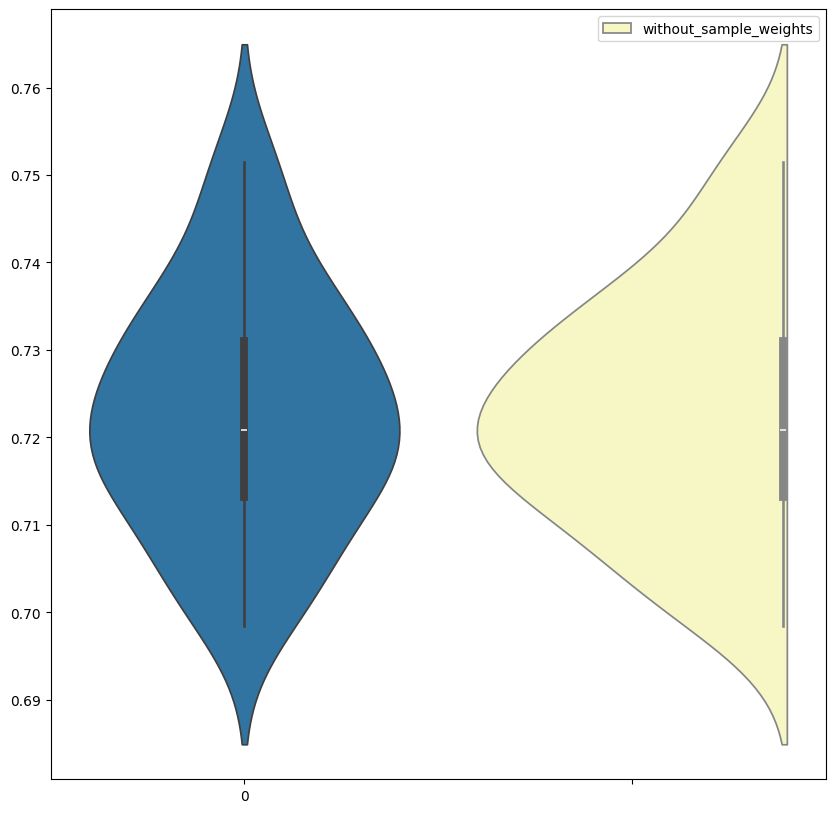

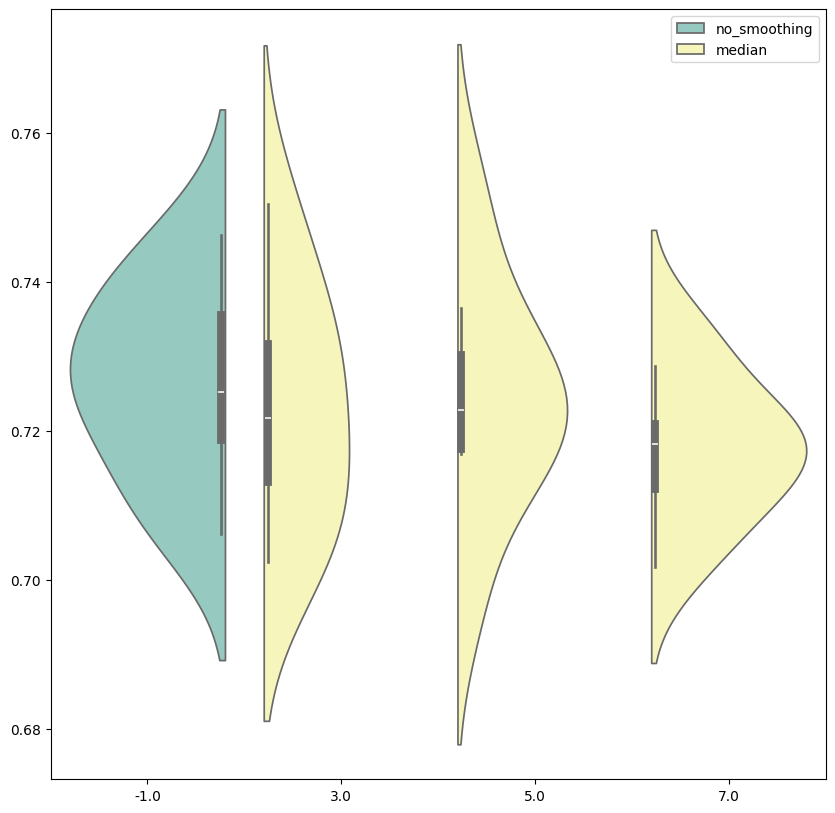

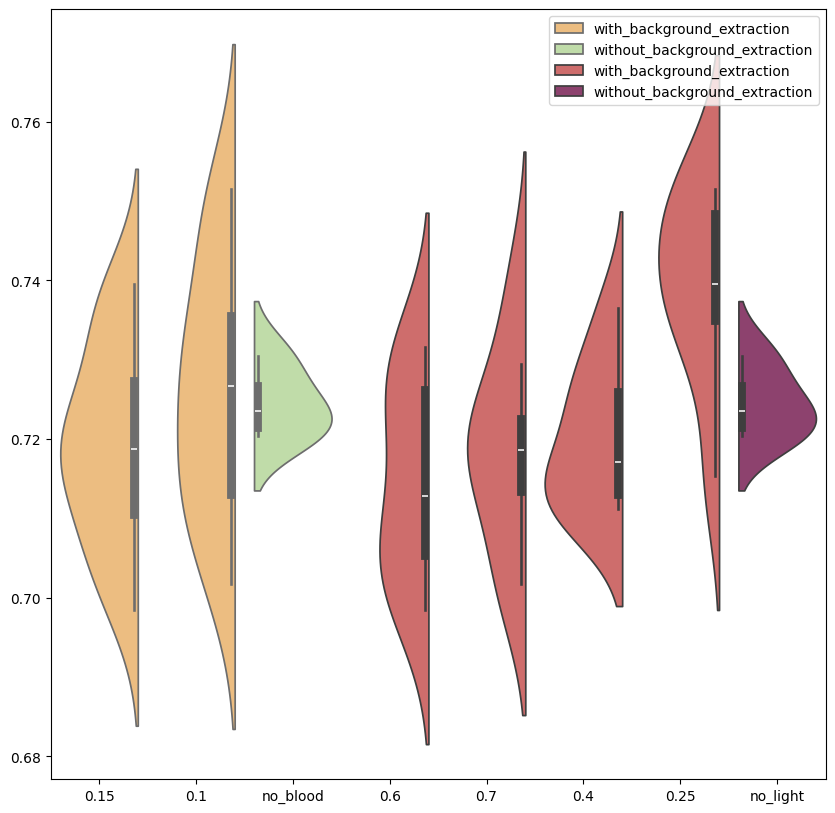

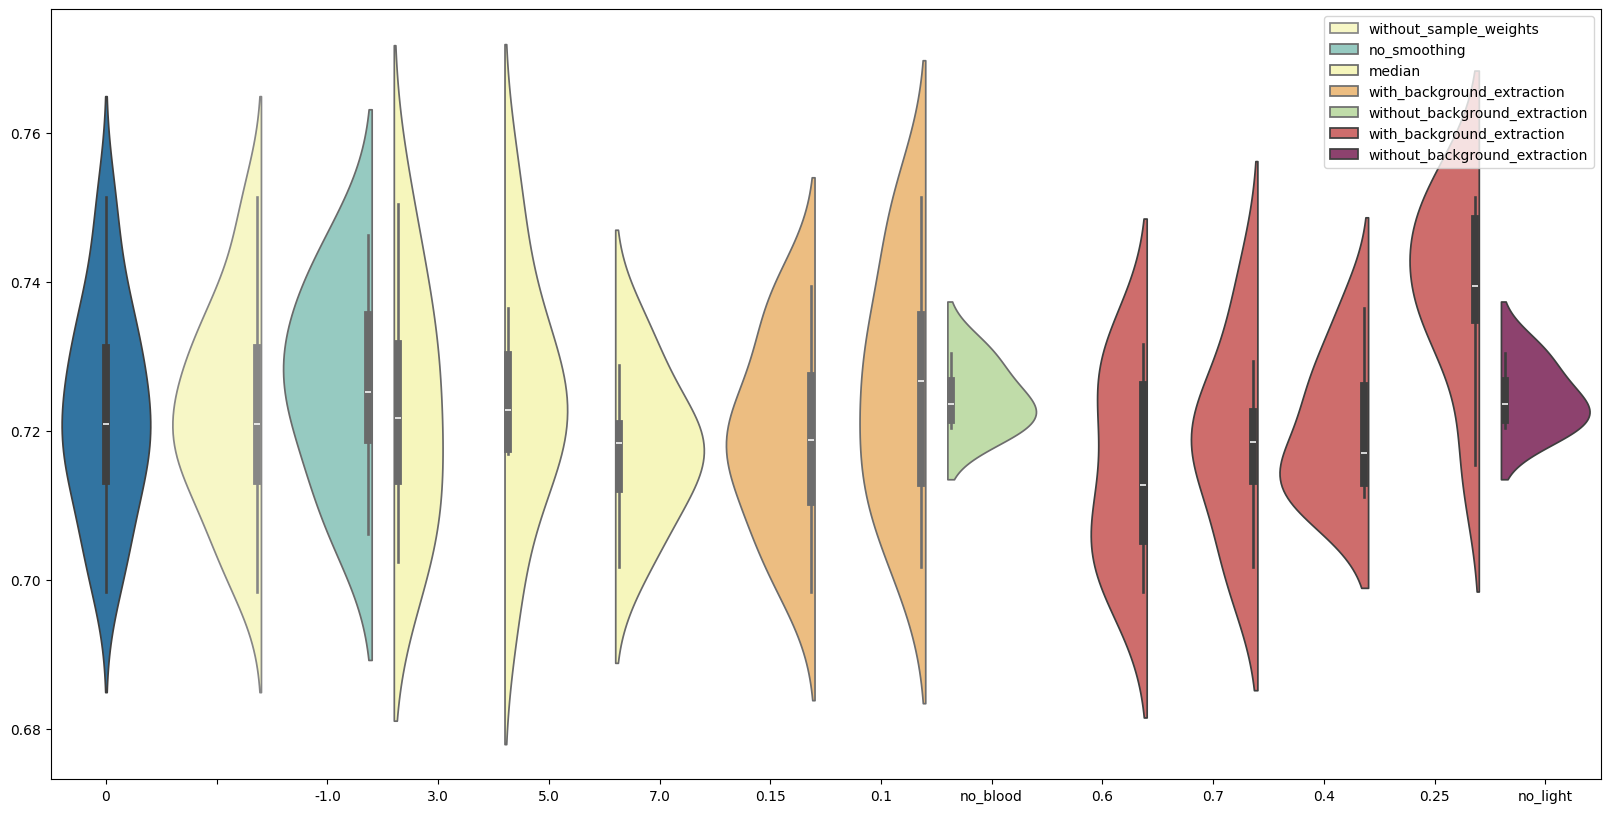

In [11]:
#Conclusions
# (definitely) better not to use sample_weights
# (definitely) not gaussian filter
# (definitely) not 3 and 7 for median, (maybe) 5

#imise - statistikal beratung

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#df = sns.load_dataset("titanic")
#sns.violinplot(x=df["age"])
table = np.array(table)


sorted_indices = np.argsort(table[:, 10])

# Sort the entire array by these indices
table = table[sorted_indices]
#print(np.max(table[:, 12]))


def plot_table(table, whole_figure=False):
    def show_and_initialize_new_plot():
        plt.show()
        plt.figure(figsize=(10, 10))
    if whole_figure:
        plt.figure(figsize=(20, 10)) 
    else:
        plt.figure(figsize=(10, 10))
    sns.violinplot( x=0, y=table[:, 10][table[:, 1] == 'svn']) 
    #plt.xlabel("sensitivity")
    #sns.violinplot( x=1, y=table[:, 10][table[:, 2] == True], fill=False,inner="quart")
    #sns.violinplot( x=1, y=table[:, 10][table[:, 2] == False], fill=False,inner="quart")
    sns.violinplot(hue=table[:, 2], y=table[:, 10], split=True, palette='Spectral')
    #plt.xticks([0, 1], ['sensitivity', 'sample_weights'])

    if not whole_figure:
        show_and_initialize_new_plot()
    sns.violinplot(x=table[:, 4], y=table[:, 10], hue=table[:, 3], split=True, palette='Set3')
    
    if not whole_figure:
        show_and_initialize_new_plot()
    sns.violinplot(x=table[:, 6], y=table[:, 10], hue=table[:, 5], split=True, palette='Spectral')
    sns.violinplot(x=table[:, 7], y=table[:, 10], hue=table[:, 5], split=True, palette='flare')
    plt.show()

#plot_table(table)
only_svn = table[table[:, 1] == 'svn']
#only_svn = table[(table[:, 1] == 'svn') & (table[:, 2] == False)]
only_svn = table[(table[:, 1] == 'svn') & (table[:, 2] == False) & (table[:, 3] != 'g')]
only_svn[:, 3][only_svn[:, 3] == None] = 'no_smoothing'
only_svn[:, 3][only_svn[:, 3] == 'g'] = 'gaussian'
only_svn[:, 3][only_svn[:, 3] == 'm'] = 'median'
only_svn[:, 6][only_svn[:, 5] == False] = 'no_blood'
only_svn[:, 7][only_svn[:, 5] == False] = 'no_light'
only_svn[:, 5][only_svn[:, 5] == True] = 'with_background_extraction'
only_svn[:, 5][only_svn[:, 5] == False] = 'without_background_extraction'
only_svn[:, 2][only_svn[:, 2] == True] = 'with_sample_weights'
only_svn[:, 2][only_svn[:, 2] == False] = 'without_sample_weights'

plot_table(only_svn)
plot_table(only_svn, whole_figure=True)

#sns.violinplot( x=table[:, 11])

    Scaling Sample_weights Smoothing Smoothing_value Background  \
0       svn           True         m             3.0      False   
1       svn          False         g             1.5       True   
2       svn          False         g             1.5       True   
3       svn          False         g             1.5       True   
4       svn          False         g             1.5       True   
..      ...            ...       ...             ...        ...   
245     svn          False         g             1.0       True   
246     svn          False         g             1.0       True   
247     svn          False         g             1.0       True   
248     svn          False         g             1.5      False   
249     svn           True         m             5.0      False   

    Background_blood Background_light Threshold Sensitivity Specificity  \
0                0.1             0.25    0.4487    0.704842    0.717497   
1                0.1             0.25    0.47

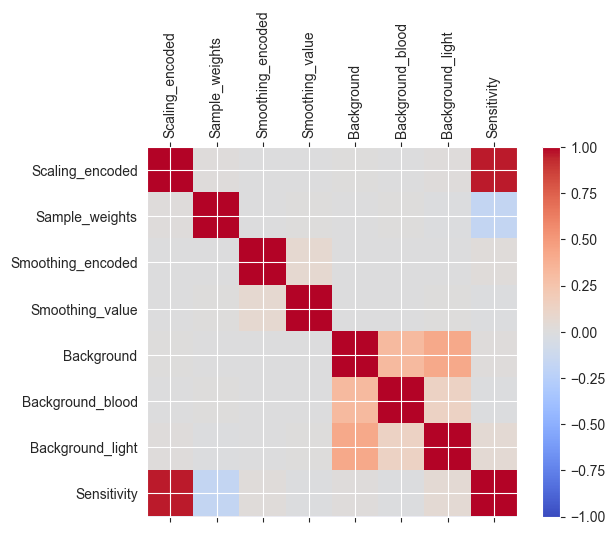

                   Scaling_encoded  Sample_weights  Smoothing_encoded  \
Scaling_encoded       1.000000e+00    8.000000e-03      -1.426161e-16   
Sample_weights        8.000000e-03    1.000000e+00      -1.464108e-16   
Smoothing_encoded    -1.426161e-16   -1.464108e-16       1.000000e+00   
Smoothing_value      -3.107659e-03    3.107659e-03       6.627978e-02   
Background            2.774093e-16   -1.619394e-16      -1.156049e-03   
Background_blood     -1.660681e-16    7.548552e-17      -3.672328e-03   
Background_light      9.983221e-03   -9.983221e-03      -2.527552e-04   
Sensitivity           9.553508e-01   -1.753418e-01       2.329693e-02   

                   Smoothing_value    Background  Background_blood  \
Scaling_encoded          -0.003108  2.774093e-16     -1.660681e-16   
Sample_weights            0.003108 -1.619394e-16      7.548552e-17   
Smoothing_encoded         0.066280 -1.156049e-03     -3.672328e-03   
Smoothing_value           1.000000 -1.734325e-03     -5.509290

In [165]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

table = np.array(table)
data = pd.DataFrame(data=table[:, 1:], columns=column_names[1:])

print(frame)

label_enc = LabelEncoder()
data['Scaling_encoded'] = label_enc.fit_transform(data['Scaling'])
data['Smoothing_encoded'] = label_enc.fit_transform(data['Smoothing'])

colimns_for_corr = ['Scaling_encoded', 
                    'Sample_weights', 
                    'Smoothing_encoded', 
                    'Smoothing_value', 
                    'Background', 
                    'Background_blood',
                    'Background_light',
                    'Sensitivity']
corr = data[colimns_for_corr].corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(colimns_for_corr),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(colimns_for_corr)
ax.set_yticklabels(colimns_for_corr)
plt.show()

print(corr)

In [7]:
def draw_smoothing(column_index):
    median_indexes = table[:, 3] == 'm'
    gaussian_indexes = table[:, 3] == 'g'
    no_smoothing_indexes = table[:, 3] == None
    plt.scatter(column_index * np.ones(table.shape[0])[median_indexes] , 
                np.arange(table.shape[0])[median_indexes], 
                s=2 * np.power(table[:, 4][median_indexes].astype(int), 2), 
                alpha=table[:, 4][median_indexes] / 7,
                c='orange', 
                #edgecolors='b',
                #facecolors='none',
                marker='$M$')
    plt.scatter(column_index * np.ones(table.shape[0])[gaussian_indexes] , 
                np.arange(table.shape[0])[gaussian_indexes], 
                s=2 * np.power((table[:, 4][gaussian_indexes] * 4).astype(int), 2), 
                alpha=table[:, 4][gaussian_indexes] / 2,
                marker='$G$')
                #edgecolors='orange',
                #facecolors='none')
    plt.scatter(column_index * np.ones(table.shape[0])[no_smoothing_indexes] , 
                np.arange(table.shape[0])[no_smoothing_indexes], 
                #s=(table[:, 4][no_smoothing_indexes] * 10).astype(int), 
                marker='X', 
                c='r')
    
def draw_background(column_index):
    def draw_no_background(column_index):
        plt.scatter(column_index * np.ones(table.shape[0])[no_background_indexes] , 
                np.arange(table.shape[0])[no_background_indexes], 
                #s=(table[:, 4][no_smoothing_indexes] * 10).astype(int), 
                marker='X', 
                c='r')
    no_background_indexes = table[:, 5] == False
    background_indexes = table[:, 5] == True
    
    draw_no_background(column_index)
    draw_no_background(column_index+1)
        
    plt.scatter(column_index * np.ones(table.shape[0])[background_indexes] , 
                np.arange(table.shape[0])[background_indexes], 
                s=[s*3 if s==15 else s for s in (table[:, 6] * 100).astype(int)[background_indexes]],
                marker='o',
                color='brown',
                alpha=[s*4 if s==0.15 else s*2 for s in table[:, 6][background_indexes]])
                #edgecolors='green',
                #facecolors='none')
    
    print(np.ones(table.shape[0])[background_indexes].shape)
    print(table[:, 7][background_indexes].shape)
    plt.scatter((column_index + 1) * np.ones(table.shape[0])[background_indexes] , 
                np.arange(table.shape[0])[background_indexes], 
                s=np.power((table[:, 7] * 100).astype(int)[background_indexes], 1.1),
                marker='o',
                color='gray',
                #edgecolors='gray',
                #facecolors='none',
                alpha=table[:, 7][background_indexes])
    
def draw_scaling(column_index):
    norm_indexes = table[:, 1] == 'normalization'
    svn_indexes = table[:, 1] == 'svn'
    
    plt.scatter(column_index * np.ones(table.shape[0])[norm_indexes] , 
                np.arange(table.shape[0])[norm_indexes], 
                s=5000, 
                #alpha=table[:, 4][norm_indexes] / 7,
                #c='orange', 
                #edgecolors='b',
                #facecolors='none',
                marker='$normalization$')
    plt.scatter(column_index * np.ones(table.shape[0])[svn_indexes] , 
                np.arange(table.shape[0])[svn_indexes], 
                s=500, 
                #alpha=table[:, 4][svn_indexes] / 2,
                marker='$svn$')
    
def draw_sample_weights(column_index):
    with_SW = table[:, 2] == True
    without_SW = table[:, 2] == False
    
    plt.scatter(column_index * np.ones(table.shape[0])[with_SW] , 
                np.arange(table.shape[0])[with_SW], 
                s=100, 
                #alpha=table[:, 4][norm_indexes] / 7,
                #c='orange', 
                #edgecolors='b',
                #facecolors='none',
                marker='$\u2713$')
    plt.scatter(column_index * np.ones(table.shape[0])[without_SW] , 
                np.arange(table.shape[0])[without_SW], 
                s=50, 
                #alpha=table[:, 4][svn_indexes] / 2,
                marker='X')

['110_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.4_' 'normalization' True 'm' 3.0 True 0.1
 0.4 '110_3D3_Nl_WT_Sm_S3_BT_B0.1_B0.4_' 0.5092 0.38349637 0.63287055
 0.5081835]
['64_3D3_Ns_WF_Sm_S5_BT_B0.1_B0.25_' 'svn' False 'm' 5.0 True 0.1 0.25
 '64_3D3_Ns_WF_Sm_S5_BT_B0.1_B0.25_' 0.479 0.75003195 0.7514524 0.7507422]
(222,)
(222,)


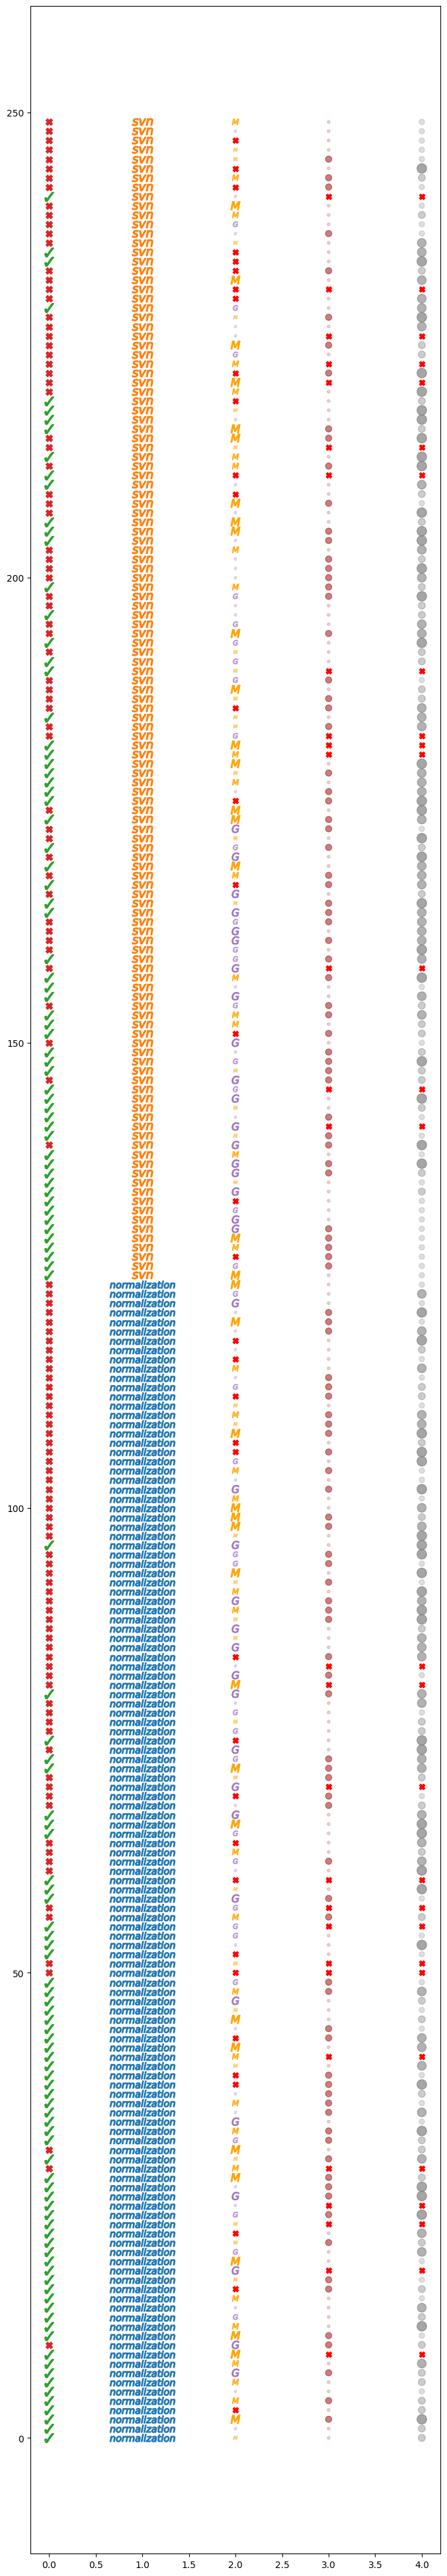

In [8]:
import matplotlib.pyplot as plt
import numpy as np

table = np.array(table)


#$\u2713$ - галочка

sorted_indices = np.argsort(table[:, 10])

# Sort the entire array by these indices
table = table[sorted_indices]
print(table[0])
print(table[-1])

#plt.figure(dpi=300)
plt.figure(figsize=(8, 50)) 

draw_scaling(column_index=1)
draw_sample_weights(column_index=0)
draw_smoothing(column_index=2)
draw_background(column_index=3)

plt.savefig('results.png')
plt.show()


In [3]:
csvfile = "/work/mi186veva-results/MainExperiment_3d_3_old/3D3_Ns_WT_Sm_S5_BT_B0.15_B0.7_/Results_with_EarlyStopping/metrics_by_threshold_0.364.csv"
comparison = "/work/mi186veva-results/MainExperiment_3d_3_old/3D3_Ns_WT_Sm_S5_BT_B0.15_B0.7_/Results_with_EarlyStopping/compare_all_thresholds.csv"

metrics = metrics_csvreader.MetricsCsvReaderComparisonFiles().read_metrics(comparison)

In [ ]:
folders = glob("/work/mi186veva-results/MainExperiment_3d_3_fixed_background/*/")

print(len(folders))

groups = {}

for folder in folders:
    name = folder.split("/")[-2]
    csvfile = os.path.join(folder, "Results_with_EarlyStopping", "metrics_by_threshold_0.364.csv")
    metrics = metrics_csvreader.MetricsCsvReader().read_metrics(csvfile)
    
    value = str(metrics["Accuracy"]["mean"])
    if not str(value) in groups:
        groups[value] = []
    groups[value].append(name)
    
print(json.dumps(groups, indent = 4))

In [18]:


folders = glob("/work/mi186veva-results/MainExperiment_3d_3_old/*/")

print(len(folders))

groups = {}

for folder in folders:
    name = folder.split("/")[-2]
    csvfile = os.path.join(folder, "Results_with_EarlyStopping", "metrics_by_threshold_0.364.csv")
    metrics = metrics_csvreader.MetricsCsvReader().read_metrics(csvfile)
    
    value = str(metrics["Accuracy"]["mean"])
    if not str(value) in groups:
        groups[value] = []
    groups[value].append(name)
    
print(json.dumps(groups, indent = 4))

249
{
    "0.1024843258534392": [
        "3D3_Ns_WF_Sm_S3_BT_B0.1_B0.7_",
        "3D3_Ns_WF_Sm_S7_BT_B0.15_B0.4_",
        "3D3_Ns_WF_Sg_S1_BT_B0.1_B0.4_",
        "3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.7_",
        "3D3_Ns_WF_S_S-1_BT_B0.1_B0.7_",
        "3D3_Ns_WF_S_S-1_BT_B0.15_B0.25_",
        "3D3_Ns_WF_Sm_S3_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sm_S3_BT_B0.15_B0.25_",
        "3D3_Ns_WF_S_S-1_BF_B0.1_B0.25_",
        "3D3_Ns_WF_Sg_S0.5_BT_B0.15_B0.7_",
        "3D3_Ns_WF_Sm_S7_BT_B0.1_B0.4_",
        "3D3_Ns_WF_Sg_S1_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sg_S0.5_BT_B0.15_B0.25_",
        "3D3_Ns_WF_Sm_S3_BT_B0.1_B0.25_",
        "3D3_Ns_WF_Sm_S5_BF_B0.1_B0.25_",
        "3D3_Ns_WF_Sg_S1.5_BT_B0.1_B0.4_",
        "3D3_Ns_WF_Sg_S0.5_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sg_S1_BT_B0.15_B0.7_",
        "3D3_Ns_WF_Sm_S5_BT_B0.15_B0.4_",
        "3D3_Ns_WF_Sm_S3_BT_B0.1_B0.6_",
        "3D3_Ns_WF_S_S-1_BT_B0.1_B0.6_",
        "3D3_Ns_WF_Sg_S1.5_BT_B0.15_B0.6_",
        "3D3_Ns_WF_Sm_S3_BT_B0.15_

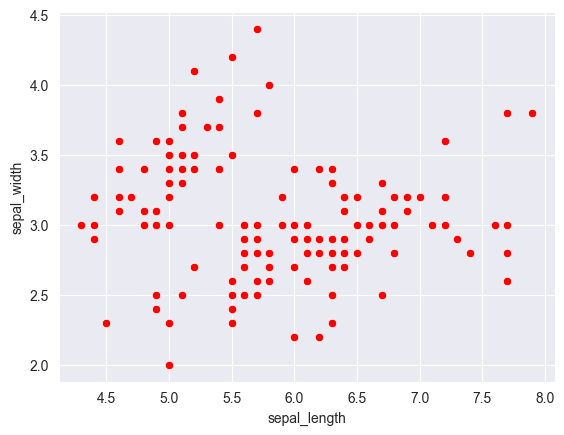

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load an example dataset
data = sns.load_dataset("iris")

# Create a plot with a specified color
sns.scatterplot(x="sepal_length", y="sepal_width", color="red", data=data)

# Display the plot
plt.show()
